# Introduction to PreProcessing

* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning

Common import¶


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# StandardScaler

Standardization is a preprocessing method used to transform continuous data to make it look normally distributed.

In scikit-learn, this is often a necessary step, because many models assume that the data you are training on is normally distributed, and if it isn't, you risk biasing your model.

The StandardScaler assumes your data is normally distributed (continuous numerical data) within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
Calculate - Subtract mean of column & div by standard deviation


When to standardize:
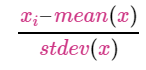

* Models in linear space
* Dataset features have high variance
* If data is not normally distributed, this is not the best scaler to use.

In [3]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

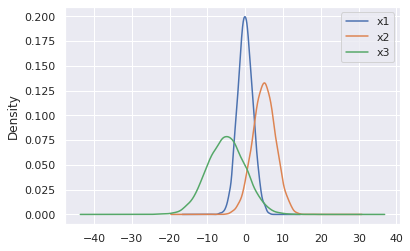

In [5]:
# plotting data

df.plot.kde()

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()